# Predicting Heart Disease using Machine Learning model

## ML model - Decision Tree Classifier

#### Objectives:

- Loading the specific dataset
- Explaining the features and target variable
- Dealing with missing values
- Perform One-hot encoding
- Splitting the dataset into train set and test set
- Perform the training with <b>Decision Tree Classifier</b>
- Showing the Decision Tree with a tree diagram
- Showing the Confusion Matrix, Classification report, and ROC-AUC
- Explaining the outcome



### Library Importation

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

#these are the libraries required for our machine learning 

### Loading the dataset & Dealing with missing values

In [20]:
df = pd.read_csv("processed.cleveland.data", header=None, na_values="?")

# header = none, because the dataset doesn't have any header
# defining that,'?' is our na (not available) value
# below we'll drop these na values

df = df.dropna()
display(df.head(10))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [21]:
print(df.shape)

(297, 14)


#### Column Names and their description

<b>age:</b> age in years <br>
<b>sex:</b> sex (1 = male; 0 = female) <br>
<b>cp:</b> chest pain type <br>

- 1 = typical angina
- 2 = atypical angina
- 3 = non-anginal pain
- 4 = asymptomatic

<b>trestbps:</b> resting blood pressure (in mm Hg on admission to the hospital)<br>
<b>chol:</b> serum cholestoral in mg/dl <br>
<b>fbs:</b> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
<b>restecg:</b> resting electrocardiographic results <br>

- 0 = normal
- 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

<b>thalach:</b> maximum heart rate achieved <br>
<b>exang:</b> exercise induced angina (1 = yes; 0 = no) <br>
<b>oldpeak:</b> ST depression induced by exercise relative to rest <br>
<b>slope:</b> the slope of the peak exercise ST segment <br>

- 1 = upsloping
- 2 = flat
- 3 = downsloping

<b>ca:</b> number of major vessels (0-3) colored by flourosopy <br>
<b>thal:</b> 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
<b>hd:</b> heart disease 

#### Renaming the columns

In [22]:
# these names are available in the source archive
df.columns = ['age', 
              'sex', 
              'cp', 
              'trestbps', 
              'chol', 
              'fbs', 
              'restecg', 
              'thalach', 
              'exang', 
              'oldpeak', 
              'slope', 
              'ca', 
              'thal', 
              'hd']

display(df.head(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


#### Target variable adjustment

In [23]:
# here hd - heart disease is our target variable
# lets see how many unique values we have in hd

print(df['hd'].value_counts())

0    160
1     54
2     35
3     35
4     13
Name: hd, dtype: int64


In [24]:
# lets set either a person has hd or not
# so convert all values greater than 0 to 1

df[df['hd'] > 1] = 1
print(df['hd'].value_counts())

0    160
1    137
Name: hd, dtype: int64


### Creating feature set and target

In [25]:
# setting everything except hd in X and rest in Y

X = df.drop('hd', axis=1)
y = df[['hd']]

print(X.shape, y.shape)

(297, 13) (297, 1)


### Performing One-hot encoding

In [26]:
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

display(X.head(10))

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,0,1,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,1,0,0
5,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,1,0,0,0,0,0,0,1,0,0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0
7,57.0,0.0,120.0,354.0,0.0,163.0,1.0,0.6,0.0,0,0,1,0,0,0,0,1,0,0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0
9,53.0,1.0,140.0,203.0,1.0,155.0,1.0,3.1,0.0,0,0,1,0,1,0,1,0,0,1


In [27]:
print(X.shape)

(297, 19)


### Spliting into train and test data sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 19) (60, 19) (237, 1) (60, 1)


### Decision tree classifier

In [29]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

### Tree diagram

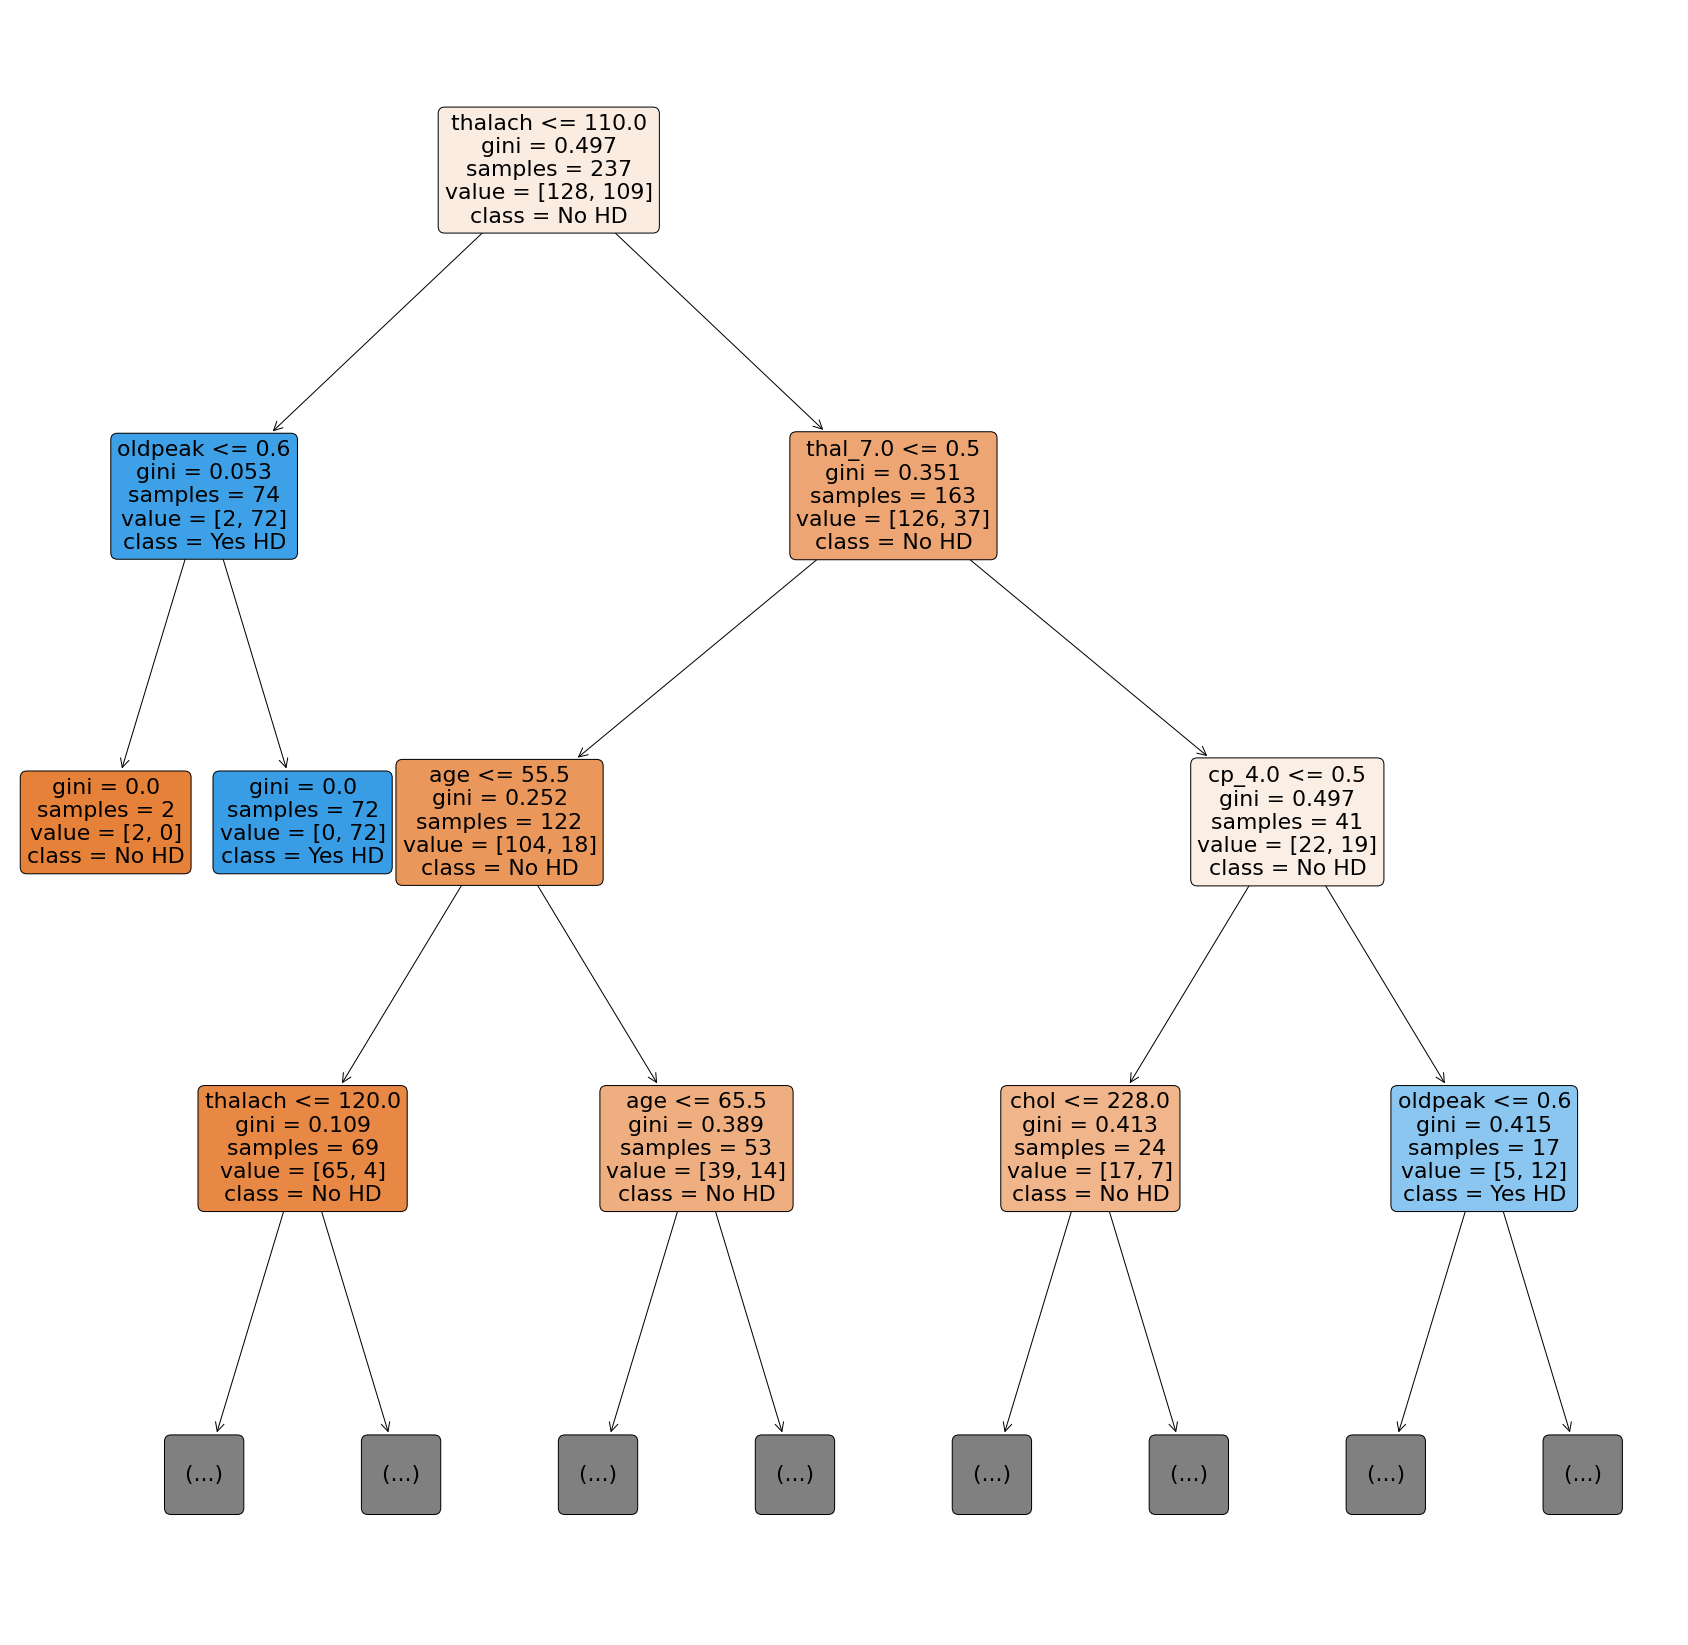

In [30]:
# lets see the decision tree classifier with a tree diagram

plt.figure(figsize = (30, 30))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["No HD", "Yes HD"],
          feature_names = X.columns,
          max_depth=3, # determines the level of depth of branches
          fontsize=22)

plt.show()

## Evaluating Model Performance

### Confusion Matrix

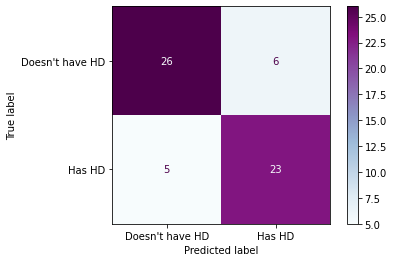

In [31]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=["Doesn't have HD", "Has HD"],
                      cmap='BuPu')
plt.show()

In [32]:
y_pred_DT = model_DT.predict(X_test) # for prediction

### Plotting the ROC curve

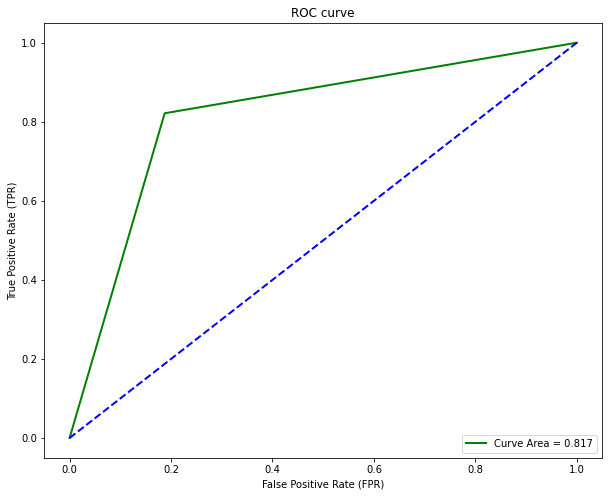

In [33]:
fpr, tpr, thr = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred_DT)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### AUC value

In [34]:
# area under curve
print(auc)

0.8169642857142857


### Classification Report 

In [35]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



### Accuracy

In [36]:
print('Accuracy: ', accuracy_score(y_test, y_pred_DT)*100, "%")

Accuracy:  81.66666666666667 %


### Outcome

-  <b>_Our model could predict a heart disease patient with 81.666..% accuracy._<b>